In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.datasets import mnist
from keras import callbacks
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import tensorflow as tf
tf.python.control_flow_ops = tf
import pydot
from keras.utils.visualize_util import plot
from IPython.display import Image

/Users/RyanSampana/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using TensorFlow backend.


# Model 2

In [2]:
model = Sequential()

img_rows, img_cols = 28,28
input_shape = (img_rows, img_cols, 1)

# first layer
model.add(Convolution2D(64, 5, 5,
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))

# second layer
model.add(Convolution2D(64, 5, 5))
model.add(Activation('relu'))

# maxpooling with dropout rate 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten
model.add(Flatten())

# dense layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(19))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

plot(model, to_file='./model_2.png',show_shapes=True)

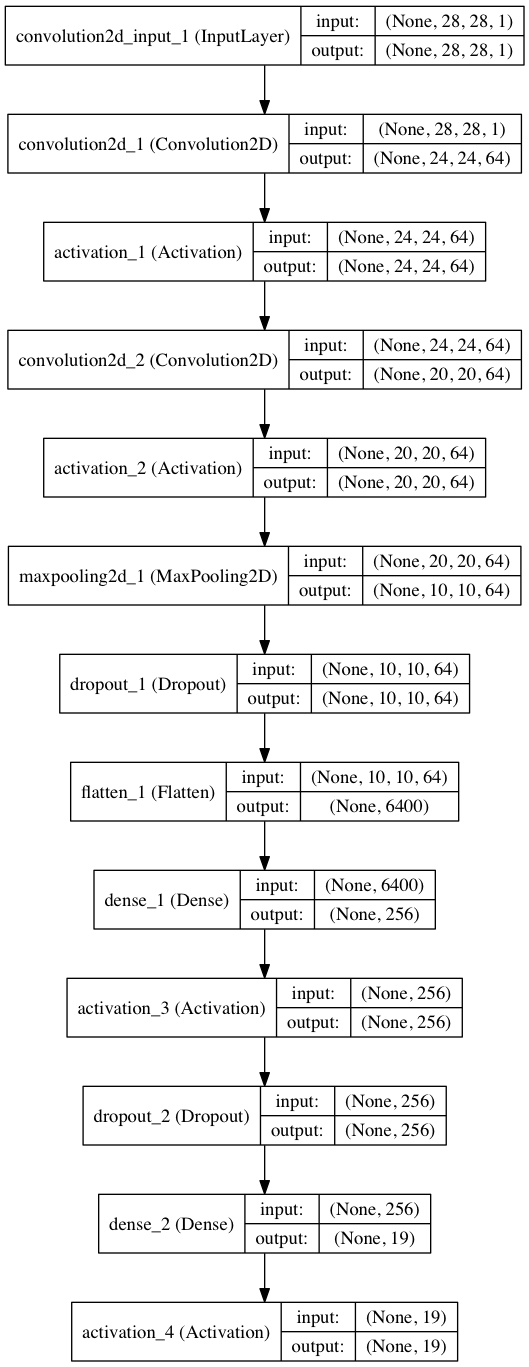

In [3]:
Image("./model_2.png")

In [4]:
df = pd.read_csv('./model_2.log')

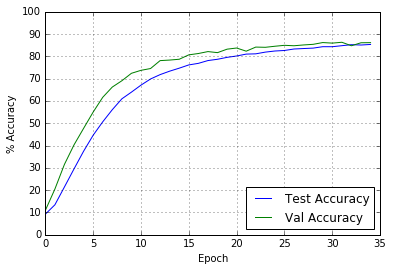

In [5]:
# plt val accuracy and test accuracy vs epoch
plt.figure(1)
plt.plot(np.array(df['epoch']),np.array(df['acc'])*100.,label='Test Accuracy')
plt.plot(np.array(df['epoch']),np.array(df['val_acc'])*100.,label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel(r'% Accuracy')
plt.yticks(np.arange(0,110,10))
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Going Deeper to 3 Layers

In [6]:
del model

# Model 3

In [7]:
batch_size = 128
nb_classes = 19
nb_epoch = 40

#input image dimensions
img_rows, img_cols = 28,28
# number of convolutional filters to use
nb_filters = 64
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (5, 5)

# CNN Model
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(Convolution2D(32, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))


model.add(Flatten())
# dense layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

plot(model, to_file='./model_3.png',show_shapes=True)

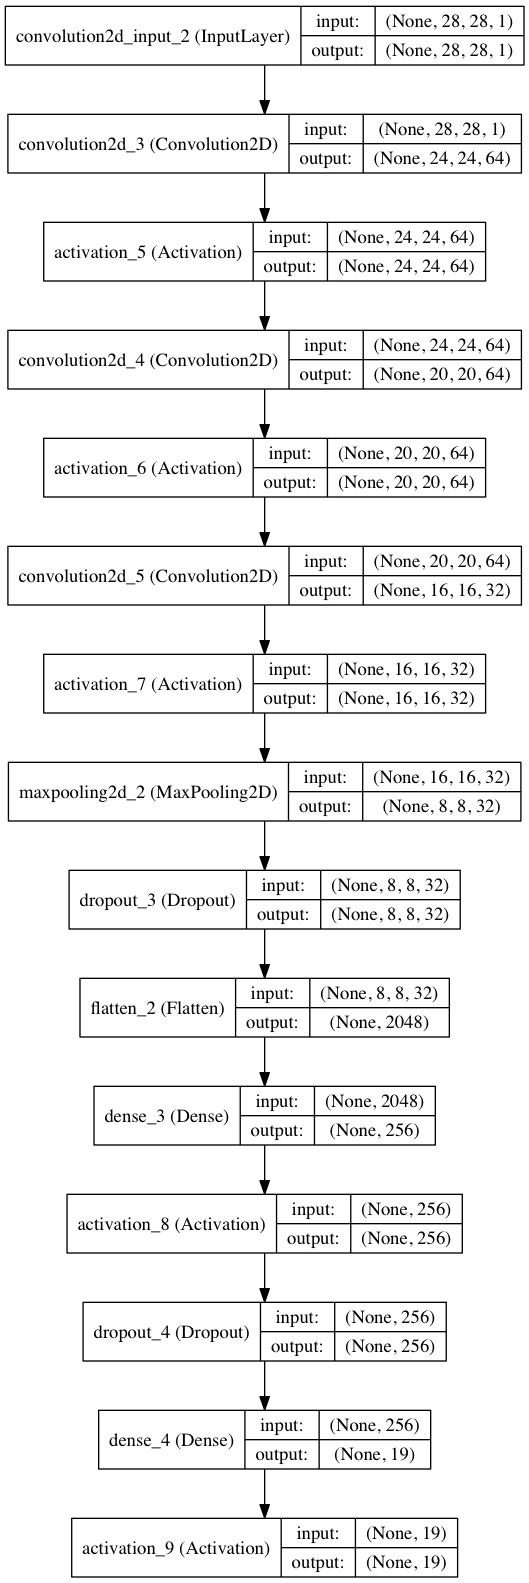

In [8]:
Image("./model_3.png")

In [9]:
df2 = pd.read_csv('./model_3.log')
df2.tail()

,epoch,acc,loss,val_acc,val_loss
31,31,0.948443,0.178241,0.946800,0.205544
32,32,0.949800,0.173031,0.951400,0.186979
33,33,0.951000,0.168430,0.947100,0.209099
34,34,0.952286,0.166672,0.944833,0.211525
35,35,0.954400,0.157884,0.948800,0.207192


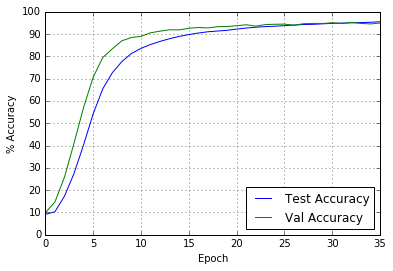

In [10]:
# plt val accuracy and test accuracy vs epoch
plt.figure(2)
plt.plot(np.array(df2['epoch']),np.array(df2['acc'])*100.,label='Test Accuracy')
plt.plot(np.array(df2['epoch']),np.array(df2['val_acc'])*100.,label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel(r'% Accuracy')
plt.yticks(np.arange(0,110,10))
plt.legend(loc='lower right')
plt.grid()
plt.show()

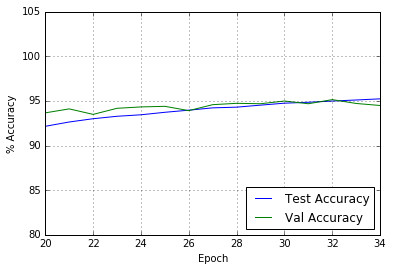

In [11]:
plt.figure(3)
plt.plot(np.array(df2['epoch'][20:35]),np.array(df2['acc'][20:35])*100.,label='Test Accuracy')
plt.plot(np.array(df2['epoch'][20:35]),np.array(df2['val_acc'][20:35])*100.,label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel(r'% Accuracy')
plt.yticks(np.arange(80,110,5))
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [13]:
del model

# Model 4
### From model 3 lets go wide again this time we go: 128 filters -> 64 filters -> 32 filters with a final dense layer of 512 
####  Currently Testing should be done by tomorrow

In [14]:
batch_size = 200
nb_classes = 19
nb_epoch = 50

#input image dimensions
img_rows, img_cols = 28,28

# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (5, 5)

# CNN
model = Sequential()

# layer 1
model.add(Convolution2D(128, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))

model.add(Activation('relu'))

# layer 2
model.add(Convolution2D(64, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))

# layer 3 we down size
model.add(Convolution2D(32, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))

# max pooling
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

# flatten pooling
model.add(Flatten())

# 1st dense layer
model.add(Dense(512))
model.add(Activation('relu'))

# class dense layer
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
plot(model, to_file='./model_4.png',show_shapes=True)

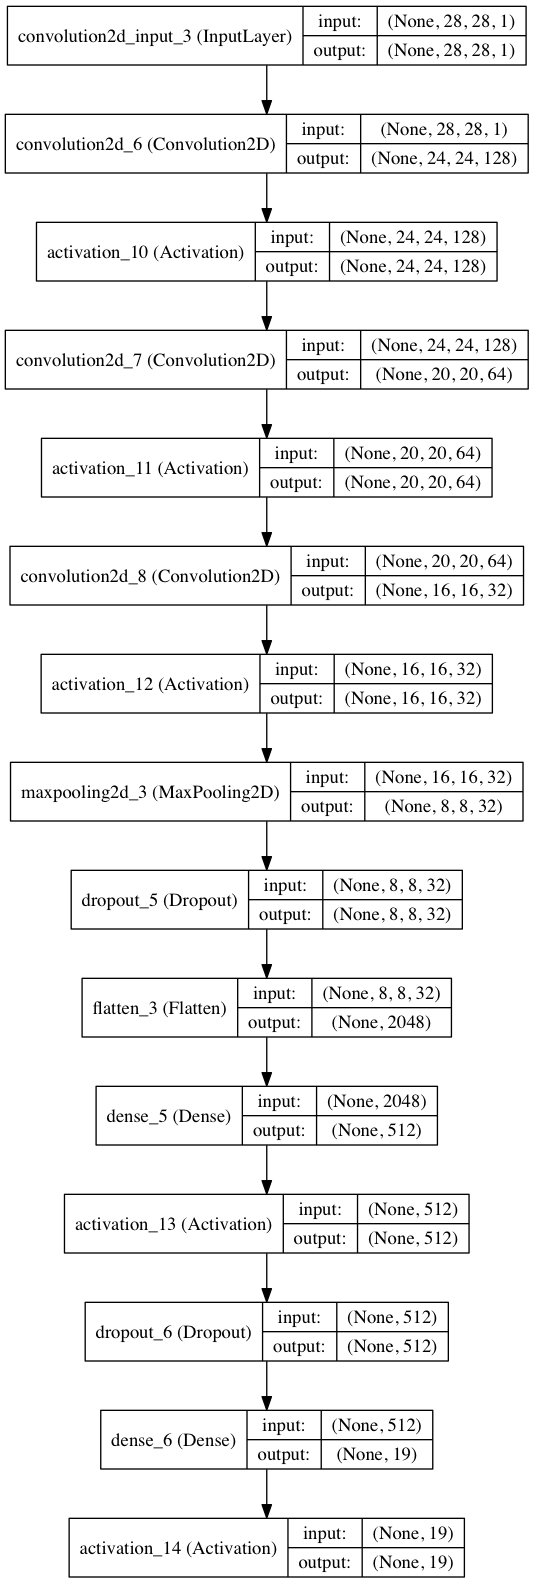

In [15]:
Image('./model_4.png')